## Mejores Modelos para Base-Aves

                Modelo  Precision  Recall  F1-Score     AUC
0        Random Forest     0.9233  0.9504    0.9366  0.9851
1              XGBoost     0.9455  0.9535    0.9495  0.9892
2  Logistic Regression     0.6317  0.7785    0.6974  0.7797
3                  SVM     0.9329  0.9365    0.9347  0.9814


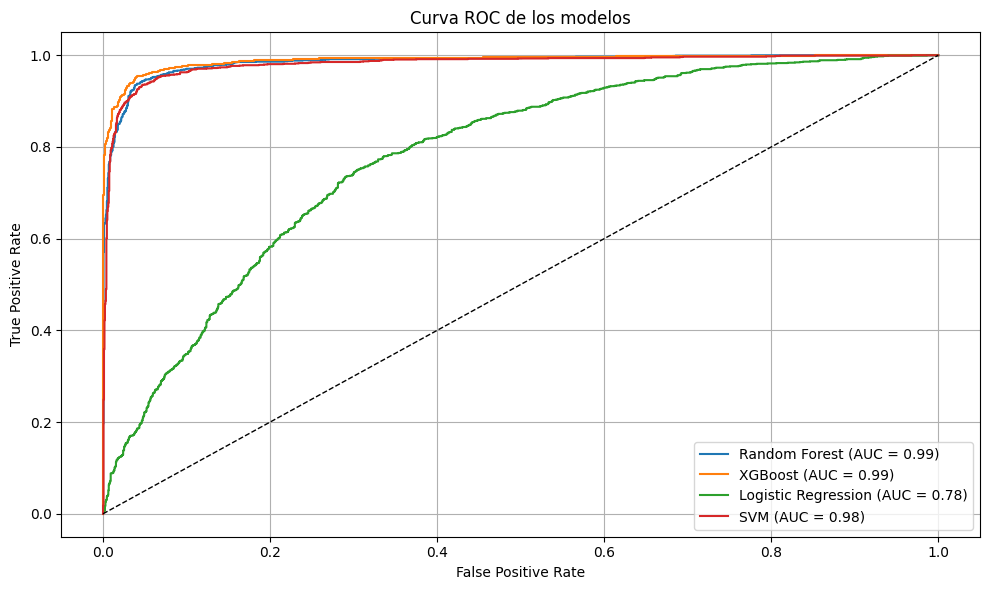

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
import shap
import seaborn as sns

df_final = pd.read_csv('data_ave_B.csv')

df_final['is_ave'] = df_final['is_ave'].astype(bool).astype(int)
X = df_final.drop(columns=['is_ave'])
y = df_final['is_ave']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

models = {
    "Random Forest": RandomForestClassifier(
        n_estimators=300,
        max_depth=50,
        min_samples_leaf=1,
        min_samples_split=4,
        max_features=0.5,
        class_weight='balanced',
        random_state=42
    ),
    "XGBoost": XGBClassifier(
        eval_metric='logloss',
        reg_alpha=4.2182194439367176e-07,
        reg_lambda=1.0130117673380171e-07,
        max_depth=20,
        learning_rate=0.1088512250935857,
        n_estimators=250,
        subsample=0.5812335862914259,
        colsample_bytree=0.9650667749763862,
        gamma=0.015596341559993059,
        min_child_weight=2,
        random_state=42
    ),
    "Logistic Regression": LogisticRegression(
        penalty='elasticnet',
        C=2.802097377064016,
        solver='saga',
        l1_ratio=0.7220956731371371,
        max_iter=1000,
        random_state= 42
    ),
    "SVM": SVC(
        kernel='rbf',
        C= 140.83016772042197,
        probability=True,
        random_state=42,
        gamma='auto',
        class_weight=None,
        tol=0.00010347304126348677
    ),
}

resultados = []

def evaluar(nombre, y_test, y_pred, y_proba):
    resultados.append({
        'Modelo': nombre,
        'Precision': round(float(precision_score(y_test, y_pred)), 4),
        'Recall': round(float(recall_score(y_test, y_pred)), 4),
        'F1-Score': round(float(f1_score(y_test, y_pred)), 4),
        'AUC': round(float(roc_auc_score(y_test, y_proba)), 4)
    })

for nombre, modelo in models.items():
    if nombre in ['Logistic Regression', 'SVM']:
        modelo.fit(X_train_scaled, y_train_bal)
        y_pred = modelo.predict(X_test_scaled)
        y_proba = modelo.predict_proba(X_test_scaled)[:, 1]
    else:
        modelo.fit(X_train_bal, y_train_bal)
        y_pred = modelo.predict(X_test)
        y_proba = modelo.predict_proba(X_test)[:, 1]

    evaluar(nombre, y_test, y_pred, y_proba)

df_resultados = pd.DataFrame(resultados)
print(df_resultados)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 6))

for nombre, modelo in models.items():
    if nombre in ['Logistic Regression', 'SVM']:
        y_proba = modelo.predict_proba(X_test_scaled)[:, 1]
    else:
        y_proba = modelo.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{nombre} (AUC = {roc_auc:.2f})")

# Diagonal
plt.plot([0, 1], [0, 1], 'k--', lw=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC de los modelos')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

## Mejores Modelos para M1-Aves

                Modelo  Precision  Recall  F1-Score     AUC
0        Random Forest     0.8962  0.9278    0.9118  0.9717
1              XGBoost     0.9035  0.9396    0.9212  0.9798
2  Logistic Regression     0.6271  0.8086    0.7064  0.7551
3                  SVM     0.9186  0.9475    0.9328  0.9772


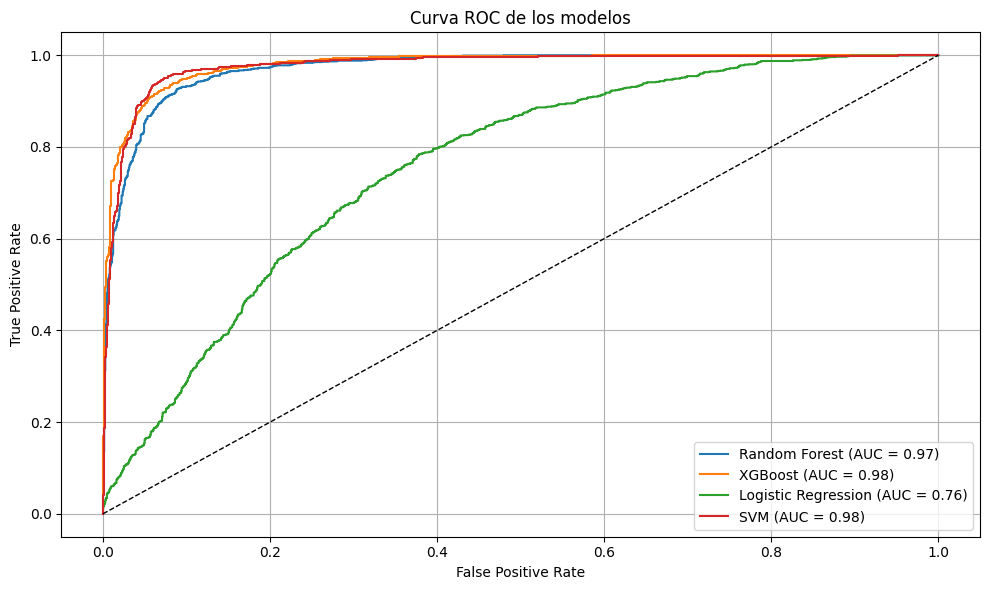

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
import shap
import seaborn as sns

df_final = pd.read_csv('data_ave_M1.csv')

df_final['is_ave'] = df_final['is_ave'].astype(bool).astype(int)
X = df_final.drop(columns=['is_ave'])
y = df_final['is_ave']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

models = {
    "Random Forest": RandomForestClassifier(
        n_estimators=250,
        max_depth=35,
        min_samples_leaf=2,
        min_samples_split=4,
        max_features=0.5,
        class_weight='balanced',
        random_state=42
    ),
    "XGBoost": XGBClassifier(
        eval_metric='logloss',
        reg_alpha=0.003777414099220677,
        reg_lambda=4.1944560810930697e-07,
        max_depth=50,
        learning_rate=0.0241619790537669,
        n_estimators=250,
        subsample=0.8605093823156437,
        colsample_bytree=0.6118225824076494,
        gamma=0.3115541440376071,
        min_child_weight=2,
        random_state=42
    ),
    "Logistic Regression": LogisticRegression(
        penalty='l1',
        C=0.007566599142613765,
        solver='liblinear',
        max_iter=1000,
        class_weight='balanced',
        random_state=42
    ),
    "SVM": SVC(
        kernel='rbf',
        C=54.15008063623478,
        probability=True,
        random_state=42,
        gamma='scale',
        class_weight=None,
        tol=0.00033341124408052156
    ),
}

resultados = []

def evaluar(nombre, y_test, y_pred, y_proba):
    resultados.append({
        'Modelo': nombre,
        'Precision': round(float(precision_score(y_test, y_pred)), 4),
        'Recall': round(float(recall_score(y_test, y_pred)), 4),
        'F1-Score': round(float(f1_score(y_test, y_pred)), 4),
        'AUC': round(float(roc_auc_score(y_test, y_proba)), 4)
    })

for nombre, modelo in models.items():
    if nombre in ['Logistic Regression', 'SVM']:
        modelo.fit(X_train_scaled, y_train_bal)
        y_pred = modelo.predict(X_test_scaled)
        y_proba = modelo.predict_proba(X_test_scaled)[:, 1]
    else:
        modelo.fit(X_train_bal, y_train_bal)
        y_pred = modelo.predict(X_test)
        y_proba = modelo.predict_proba(X_test)[:, 1]

    evaluar(nombre, y_test, y_pred, y_proba)

df_resultados = pd.DataFrame(resultados)
print(df_resultados)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 6))

for nombre, modelo in models.items():
    if nombre in ['Logistic Regression', 'SVM']:
        y_proba = modelo.predict_proba(X_test_scaled)[:, 1]
    else:
        y_proba = modelo.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{nombre} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC de los modelos')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

## Mejores Modelos para M2-Aves

                Modelo  Precision  Recall  F1-Score     AUC
0        Random Forest     0.9073  0.9370    0.9219  0.9770
1              XGBoost     0.9182  0.9586    0.9379  0.9820
2  Logistic Regression     0.6809  0.7567    0.7168  0.7653
3                  SVM     0.9389  0.9413    0.9401  0.9786


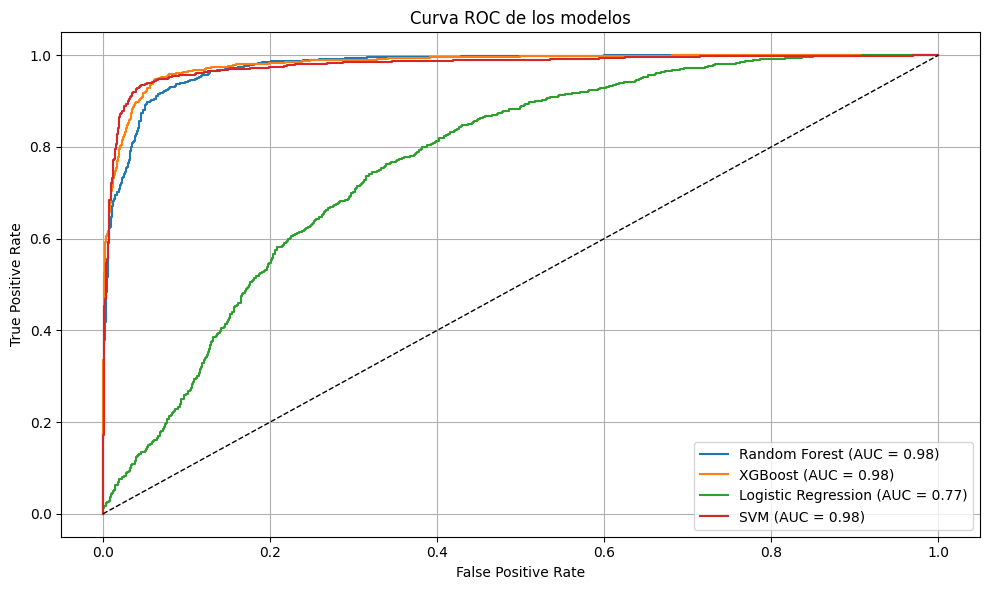

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
import shap
import seaborn as sns

df_final = pd.read_csv('data_ave_M2.csv')

df_final['is_ave'] = df_final['is_ave'].astype(bool).astype(int)
X = df_final.drop(columns=['is_ave'])
y = df_final['is_ave']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

models = {
    "Random Forest": RandomForestClassifier(
        n_estimators=200,
        max_depth=35,
        min_samples_leaf=1,
        min_samples_split=5,
        max_features=0.5,
        class_weight=None,
        random_state=42
    ),
    "XGBoost": XGBClassifier(
        eval_metric='logloss',
        reg_alpha=0.00034931065723223286,
        reg_lambda=1.0874987646617658e-05,
        max_depth=25,
        learning_rate=0.06883696900549167,
        n_estimators=300,
        subsample=0.6569527649456601,
        colsample_bytree=0.9947981127520599,
        gamma=0.4987991860418566,
        min_child_weight=3,
        random_state=42
    ),
    "Logistic Regression": LogisticRegression(
        penalty='l2',
        C=0.025126101021326355,
        solver='liblinear',
        max_iter=1000,
        class_weight='balanced',
        random_state=42
    ),
    "SVM": SVC(
        kernel='rbf',
        C=90.10431536842776,
        probability=True,
        random_state=42,
        gamma='auto',
        class_weight= None,
        tol= 0.0031885233970393337
    ),
}

resultados = []

def evaluar(nombre, y_test, y_pred, y_proba):
    resultados.append({
        'Modelo': nombre,
        'Precision': round(float(precision_score(y_test, y_pred)), 4),
        'Recall': round(float(recall_score(y_test, y_pred)), 4),
        'F1-Score': round(float(f1_score(y_test, y_pred)), 4),
        'AUC': round(float(roc_auc_score(y_test, y_proba)), 4)
    })

for nombre, modelo in models.items():
    if nombre in ['Logistic Regression', 'SVM']:
        modelo.fit(X_train_scaled, y_train_bal)
        y_pred = modelo.predict(X_test_scaled)
        y_proba = modelo.predict_proba(X_test_scaled)[:, 1]
    else:
        modelo.fit(X_train_bal, y_train_bal)
        y_pred = modelo.predict(X_test)
        y_proba = modelo.predict_proba(X_test)[:, 1]

    evaluar(nombre, y_test, y_pred, y_proba)

df_resultados = pd.DataFrame(resultados)
print(df_resultados)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 6))

for nombre, modelo in models.items():
    if nombre in ['Logistic Regression', 'SVM']:
        y_proba = modelo.predict_proba(X_test_scaled)[:, 1]
    else:
        y_proba = modelo.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{nombre} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC de los modelos')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()